### Import the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-

In [2]:
# Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Look at the data type of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# Get the shape the arrays
print('x_train shape:' , x_train.shape)
print('y_train shape:' , y_train.shape)
print('x_test shape:' , x_test.shape)
print('y_test shape:' , y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
# Take a look at the first image of an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

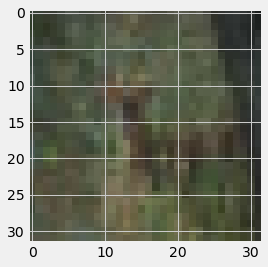

In [6]:
# show the image as a picture
img = plt.imshow(x_train[index])

In [7]:
# Get the image label
print('The image label is:', y_train[index] )

The image label is: [4]


In [8]:
# Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']
# Print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [9]:
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
# Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
# Print the new labels of the image/picture above
print('The one hot label is:' , y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [12]:
# Normalize the pixtels to the value between 0 and 1
x_train = x_train/255
y_train = y_train/255

In [13]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [14]:
# create the model architechture
model = Sequential()

# Add the first layer
model.add(Conv2D(32,(5,5), activation = 'relu', input_shape = (32, 32, 3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another convolution layer
model.add(Conv2D(32,(5,5), activation = 'relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with 1000 layers
model.add(Dense(1000, activation = 'relu'))


# Add a dropout layer
model.add(Dropout(0.5))


# Add a layer with 500 layers
model.add(Dense(500, activation = 'relu'))


# Add a dropout layer
model.add(Dropout(0.5))


# Add a layer with 250 layers
model.add(Dense(250, activation = 'relu'))


# Add a layer with 10 layers
model.add(Dense(10, activation = 'softmax'))

In [15]:
# Compile the model
model.compile(loss = 'categorical_crossentropy', 
             optimizer = 'adam',
             metrics = ['accuracy'])


In [16]:
# Train the model
hist = model.fit(x_train, y_train_one_hot,
                batch_size = 256,
                epochs = 10,
                validation_split = 0.2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 28s 706us/step - loss: 1.7796 - accuracy: 0.3347 - val_loss: 1.4452 - val_accuracy: 0.4727
Epoch 2/10
40000/40000 [==============================] - 29s 721us/step - loss: 1.3885 - accuracy: 0.4940 - val_loss: 1.2649 - val_accuracy: 0.5468
Epoch 3/10
40000/40000 [==============================] - 31s 785us/step - loss: 1.2462 - accuracy: 0.5512 - val_loss: 1.1895 - val_accuracy: 0.5751
Epoch 4/10
40000/40000 [==============================] - 30s 749us/step - loss: 1.1463 - accuracy: 0.5917 - val_loss: 1.0854 - val_accuracy: 0.6143
Epoch 5/10
40000/40000 [==============================] - 31s 772us/step - loss: 1.0764 - accuracy: 0.6171 - val_loss: 1.0810 - val_accuracy: 0.6155
Epoch 6/10
40000/40000 [==============================] - 32s 793us/step - loss: 1.0017 - accuracy: 0.6450 - val_loss: 1.0061 - val_accuracy: 0.6433
Epoch 7/10
40000/40000 [==============================]

In [17]:
# Evaluate the model using the test dataset
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 2s 234us/step


0.5288000106811523

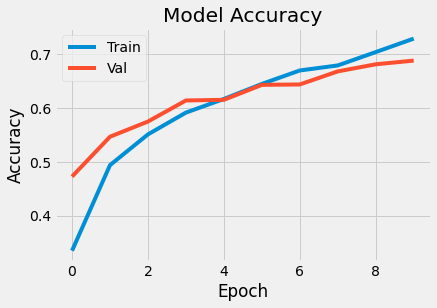

In [18]:
# visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

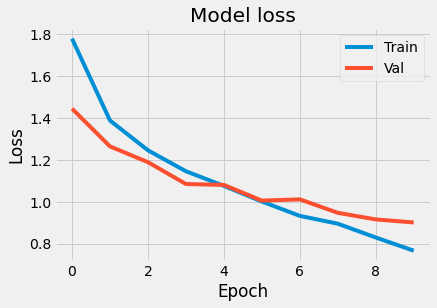

In [19]:
# Visualise the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc= 'upper right')
plt.show()

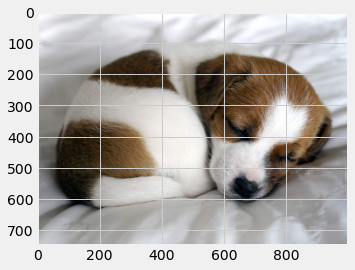

In [20]:
# Test the model with the example


# show the image
new_image = plt.imread(r'C:\Users\Yash Kumar\Pictures\puppy.jpg')
img = plt.imshow(new_image)

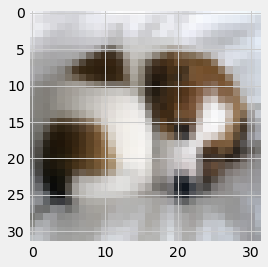

In [21]:
# Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

In [22]:
# Get the model predictions
predictions = model.predict(np.array([resized_image]))
# show the predictions
predictions

array([[1.5599857e-03, 6.0461258e-04, 3.5580408e-03, 1.1582315e-01,
        5.7255279e-04, 7.9914582e-01, 7.5240224e-04, 4.6008807e-02,
        4.9622951e-04, 3.1478401e-02]], dtype=float32)

In [23]:
# sort the predictions least to greatest
list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = predictions
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j]  = temp
            
# show the sorted labels in orders
print(list_index)


[5, 3, 7, 9, 2, 0, 6, 1, 4, 8]


In [24]:
# Print the first 5 predictions
for i in range(5):
    print(classification[list_index[i]], ':' , round(predictions[0][list_index[i]]*100, 2), '%')

dog : 79.91 %
cat : 11.58 %
horse : 4.6 %
truck : 3.15 %
bird : 0.36 %
